In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
train_data = pd.read_csv("../dataset/jmeter_train.csv")
test_data = pd.read_csv("../dataset/jmeter_test.csv")

train_data

,F72,F25,F65,F68,F101,F104,F105,F15-NA,F15-private,F15-protected,...,F71-alf@apache.org,F71-fschumacher@unknown,F71-milamber@apache.org,F71-thads@apache.org,F71-rjung@apache.org,F71-sebb@apache.org,F71-mstover1@apache.org,F71-undera@apache.org,F71-pmouawad@unknown,label
0,0.825454,0.798343,0.219512,0.061856,0.013274,0.103392,0.649425,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1,0.825454,0.798343,0.219512,0.061856,0.040928,0.103392,0.323892,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
2,0.825454,0.798343,0.219512,0.061856,0.040237,0.103392,0.098522,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
3,0.528404,0.553549,0.065041,0.000000,0.140545,0.069650,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,1.000000,1.000000,0.178862,0.113402,0.043896,0.022875,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0.459502,0.456014,0.130081,0.051546,0.142106,0.205682,0.049403,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
600,0.459502,0.456014,0.211382,0.051546,0.106875,0.259977,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
601,0.459502,0.456014,0.211382,0.051546,0.113921,0.259977,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
602,0.459502,0.456014,0.211382,0.051546,0.093394,0.259977,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [3]:
feature_columns = ['F72', 'F25', 'F65', 'F68', 'F101', 'F104', 'F105', 'F15-NA',
       'F15-private', 'F15-protected', 'F15-public', 'F22', 'F123', 'F77',
       'F41', 'F126','F71-dev-null@apache.org', 'F71-mblankestijn@apache.org',
       'F71-fschumacher@apache.org', 'F71-jsalvata@apache.org',
       'F71-dims@apache.org', 'F71-jeremy_a@apache.org',
       'F71-seade@apache.org', 'F71-oros@apache.org', 'F71-woolfel@apache.org',
       'F71-pmouawad@apache.org', 'F71-alf@apache.org',
       'F71-fschumacher@unknown', 'F71-milamber@apache.org',
       'F71-thads@apache.org', 'F71-rjung@apache.org', 'F71-sebb@apache.org',
       'F71-mstover1@apache.org', 'F71-undera@apache.org',
       'F71-pmouawad@unknown']

X_train = train_data[feature_columns]
y_train = train_data['label']

X_test = test_data[feature_columns]
y_test = test_data['label']

In [4]:
# Logistic Regression Model

logistic_model = LogisticRegression()

# Define hyperparameters to tune
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

# GridSearchCV for hyperparameter tuning
grid_search_logistic = GridSearchCV(logistic_model, param_grid, cv=5, scoring='f1')

# Fit the model
grid_search_logistic.fit(X_train, y_train)

# Best parameters
print("Best parameters for Logistic Regression: ", grid_search_logistic.best_params_)


Best parameters for Logistic Regression:  {'C': 10, 'solver': 'lbfgs'}


In [5]:
# Predict on the test data
y_pred_logistic = grid_search_logistic.predict(X_test)
y_proba_logistic = grid_search_logistic.predict_proba(X_test)[:, 1]

# Evaluation Metrics for Logistic Regression
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Precision:", precision_score(y_test, y_pred_logistic))
print("Recall:", recall_score(y_test, y_pred_logistic))
print("F1 Score:", f1_score(y_test, y_pred_logistic))
print("AUC Score:", roc_auc_score(y_test, y_proba_logistic))

Logistic Regression Metrics:
Accuracy: 0.7895595432300163
Precision: 0.6052631578947368
Recall: 0.31724137931034485
F1 Score: 0.416289592760181
AUC Score: 0.7795608605953432


In [6]:
# Support Vector Machine Model

svm_model = SVC(probability=True)

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='f1')

grid_search_svm.fit(X_train, y_train)

print("Best parameters for SVM:", grid_search_svm.best_params_)

Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}


In [7]:
y_pred_svm = grid_search_svm.predict(X_test)
y_proba_svm = grid_search_svm.predict_proba(X_test)[:, 1]

print("SVM Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall:", recall_score(y_test, y_pred_svm))
print("F1 Score:", f1_score(y_test, y_pred_svm))
print("AUC Score:", roc_auc_score(y_test, y_proba_svm))

SVM Metrics:
Accuracy: 0.8597063621533442
Precision: 0.8933333333333333
Recall: 0.46206896551724136
F1 Score: 0.6090909090909091
AUC Score: 0.9089448865310934


In [8]:
# Random Forest Model

rf_model = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='f1')

grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [9]:
y_pred_rf = grid_search_rf.predict(X_test)
y_proba_rf = grid_search_rf.predict_proba(X_test)[:, 1]

print("Random Forest Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("AUC Score:", roc_auc_score(y_test, y_proba_rf))


Random Forest Metrics:
Accuracy: 0.9070146818923328
Precision: 0.94
Recall: 0.6482758620689655
F1 Score: 0.7673469387755102
AUC Score: 0.973209549071618


In [10]:
# Compare the models
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_logistic),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf)
]
precisions = [
    precision_score(y_test, y_pred_logistic),
    precision_score(y_test, y_pred_svm),
    precision_score(y_test, y_pred_rf)
]
recalls = [
    recall_score(y_test, y_pred_logistic),
    recall_score(y_test, y_pred_svm),
    recall_score(y_test, y_pred_rf)
]
f1_scores = [
    f1_score(y_test, y_pred_logistic),
    f1_score(y_test, y_pred_svm),
    f1_score(y_test, y_pred_rf)
]
auc_scores = [
    roc_auc_score(y_test, y_proba_logistic),
    roc_auc_score(y_test, y_proba_svm),
    roc_auc_score(y_test, y_proba_rf)
]

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'AUC Score': auc_scores
})

results_df


,Model,Accuracy,Precision,Recall,F1 Score,AUC Score
0,Logistic Regression,0.789560,0.605263,0.317241,0.416290,0.779561
1,SVM,0.859706,0.893333,0.462069,0.609091,0.908945
2,Random Forest,0.907015,0.940000,0.648276,0.767347,0.973210


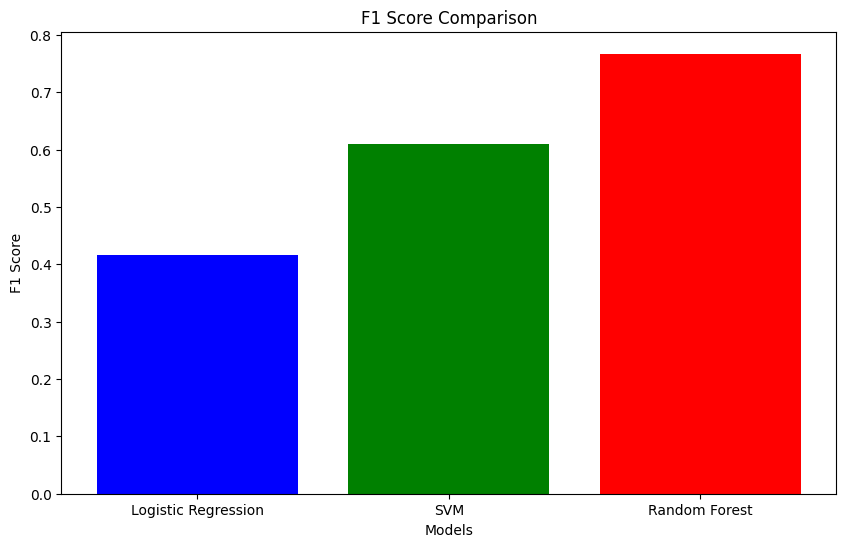

In [11]:
# Plotting the F1 Score comparison
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores, color=['blue', 'green', 'red'])
plt.title('F1 Score Comparison')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.show()

In [12]:
from sklearn.ensemble import VotingClassifier

base_models = [
    ('logistic', grid_search_logistic.best_estimator_),
    ('svm', grid_search_svm.best_estimator_),
    ('rf', grid_search_rf.best_estimator_)
]

# Hard Voting Classifier (majority voting)
hard_voting_clf = VotingClassifier(estimators=base_models, voting='hard')
hard_voting_clf.fit(X_train, y_train)

# Predict using hard voting (class predictions)
y_pred_hard_voting = hard_voting_clf.predict(X_test)

# Metrics for Hard Voting 
print("Hard Voting Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_hard_voting))
print("Precision:", precision_score(y_test, y_pred_hard_voting))
print("Recall:", recall_score(y_test, y_pred_hard_voting))
print("F1 Score:", f1_score(y_test, y_pred_hard_voting))
print("AUC Score: Not available for hard voting\n")

# Soft Voting Classifier (average probabilities)
soft_voting_clf = VotingClassifier(estimators=base_models, voting='soft')
soft_voting_clf.fit(X_train, y_train)

# Predict and evaluate soft voting (probabilities are available)
y_pred_soft_voting = soft_voting_clf.predict(X_test)
y_proba_soft_voting = soft_voting_clf.predict_proba(X_test)[:, 1]

print("Soft Voting Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_soft_voting))
print("Precision:", precision_score(y_test, y_pred_soft_voting))
print("Recall:", recall_score(y_test, y_pred_soft_voting))
print("F1 Score:", f1_score(y_test, y_pred_soft_voting))
print("AUC Score:", roc_auc_score(y_test, y_proba_soft_voting))


Hard Voting Classifier Metrics:
Accuracy: 0.8580750407830342
Precision: 0.9142857142857143
Recall: 0.4413793103448276
F1 Score: 0.5953488372093023
AUC Score: Not available for hard voting

Soft Voting Classifier Metrics:
Accuracy: 0.8433931484502447
Precision: 0.9298245614035088
Recall: 0.36551724137931035
F1 Score: 0.5247524752475248
AUC Score: 0.9412908930150309
